In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train=pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/DeteccionDeAnomalias/master/Datos/train_X_9jXqqNo.csv")
X_train.head(3)

,Unnamed: 0,SAMPLE_ID,GROUP_ID,ASSET_ID,MEASURE_TYPE,MEASURE_VALUE,MEASURE_WEEKDAY,MEASURE_WEEK
0,0,1,2,1,1,NaN,1,1
1,1,1,2,1,2,NaN,1,1
2,2,1,2,1,3,19.0,1,1


In [3]:
X_train = X_train.drop('Unnamed: 0', axis=1)
X_train.columns= map(str.lower, X_train.columns)
print(X_train.shape)
X_train.head(3)

(241696, 7)


,sample_id,group_id,asset_id,measure_type,measure_value,measure_weekday,measure_week
0,1,2,1,1,NaN,1,1
1,1,2,1,2,NaN,1,1
2,1,2,1,3,19.0,1,1


In [4]:
X_train.describe()

,sample_id,group_id,asset_id,measure_type,measure_value,measure_weekday,measure_week
count,241696.000000,241696.000000,241696.000000,241696.000000,170352.000000,241696.000000,241696.000000
mean,52.500000,2.674699,42.000000,2.500000,19.270992,4.000000,52.500000
std,30.020888,0.468488,23.958347,1.118036,45.299878,2.000004,30.020888
min,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,26.750000,2.000000,21.000000,1.750000,0.000000,2.000000,26.750000
50%,52.500000,3.000000,42.000000,2.500000,2.000000,4.000000,52.500000
75%,78.250000,3.000000,63.000000,3.250000,18.000000,6.000000,78.250000
max,104.000000,3.000000,83.000000,4.000000,728.000000,7.000000,104.000000


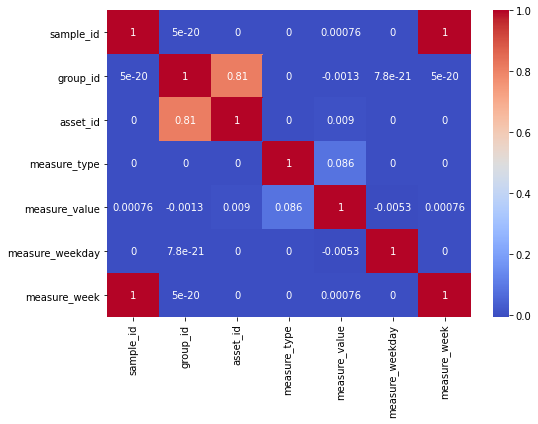

In [5]:
#Se tiene la hipotesis Sample ID == MESSURE _WEEK
def correlacion(dataframe, grafica = True, figsize=(8,6)):
    corr=dataframe.corr()                #creamos la matriz de correlación
    fig = plt.figure(figsize = figsize)
    if grafica == True:
        sns.heatmap(corr, cmap="coolwarm", annot=True, square=False)
        fig.tight_layout()
    return corr

corr_matrix=correlacion(X_train, grafica=True)

In [6]:
X_train = X_train.drop('sample_id', axis=1)

for col in X_train.columns:
    print(col)
    print(X_train[col].unique(),"\n")

group_id
[2 3] 

asset_id
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83] 

measure_type
[1 2 3 4] 

measure_value
[ nan  19.   0.   8.   9.   6.   2.  33.   3.  31.  23.  14.   7.  58.
  10.  35.  51.  38.  48.  11.  56.   5.  50.  36.  27.  22.   1.  21.
   4.  28.  12.  13.  15.  26.  17.  29.  16.  20.  24.  18.  41.  30.
  32.  34.  42.  43.  47.  25.  60.  59.  44.  40.  45.  55.  94.  70.
  57.  64.  68.  53.  49.  52.  63.  54.  66.  37.  46.  89.  77.  90.
  61.  39.  83.  97. 104.  69.  71.  65.  82.  74.  84.  81.  75.  88.
 136. 143. 150. 158. 165. 177.  78. 196. 100. 206. 116. 237. 138. 260.
 137. 253. 229. 135. 273. 178. 242. 141. 246. 134. 282. 164. 294. 191.
 297. 303. 181. 289. 270. 255. 155. 276. 154. 277. 170. 304. 197. 316.
 208. 264. 171. 261. 160. 225. 139. 256.

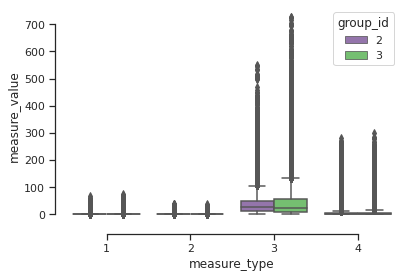

In [7]:
sns.set(style="ticks", palette="muted")


sns.boxplot(x="measure_type", y="measure_value",
            hue="group_id", palette=["m","g"], 
            data=X_train)
sns.despine(offset=10, trim=True)

In [8]:
X_train.head(3)

,group_id,asset_id,measure_type,measure_value,measure_weekday,measure_week
0,2,1,1,NaN,1,1
1,2,1,2,NaN,1,1
2,2,1,3,19.0,1,1


## Formateo de DataFrame

De manera que nos quedemos con un renglon con las cuatro mediciones para cada día en cada instalación

In [9]:
X_train=pd.pivot_table(X_train, index=['asset_id', 'group_id','measure_week', 'measure_weekday'], 
               columns=['measure_type'],values=['measure_value'],aggfunc='mean',).reset_index()
X_train.columns=['asset_id', 'group_id','week', 'weekday', 't1','t2','t3','t4']
X_train.head(3)

,asset_id,group_id,week,weekday,t1,t2,t3,t4
0,1,2,1,1,NaN,NaN,19.0,0.0
1,1,2,1,2,NaN,NaN,8.0,0.0
2,1,2,1,3,NaN,NaN,9.0,0.0


In [10]:
X_train.describe()

,asset_id,group_id,week,weekday,t1,t2,t3,t4
count,60424.000000,60424.000000,60424.000000,60424.000000,24752.000000,24752.000000,60424.000000,60424.000000
mean,42.000000,2.674699,52.500000,4.000000,1.536765,0.349548,45.185075,8.372484
std,23.958495,0.468491,30.021075,2.000017,5.029422,2.004578,64.641355,23.002216
min,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,26.750000,2.000000,0.000000,0.000000,9.000000,0.000000
50%,42.000000,3.000000,52.500000,4.000000,0.000000,0.000000,25.000000,1.000000
75%,63.000000,3.000000,78.250000,6.000000,1.000000,0.000000,54.000000,6.000000
max,83.000000,3.000000,104.000000,7.000000,76.000000,40.000000,728.000000,299.000000


In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60424 entries, 0 to 60423
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   asset_id  60424 non-null  int64  
 1   group_id  60424 non-null  int64  
 2   week      60424 non-null  int64  
 3   weekday   60424 non-null  int64  
 4   t1        24752 non-null  float64
 5   t2        24752 non-null  float64
 6   t3        60424 non-null  float64
 7   t4        60424 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 3.7 MB


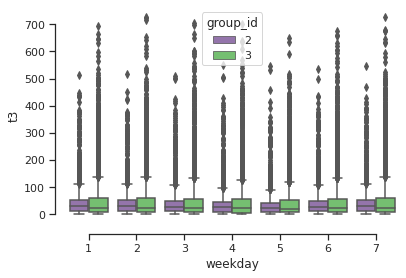

In [12]:
sns.set(style="ticks", palette="muted")


sns.boxplot(x="weekday", y="t3",
            hue="group_id", palette=["m","g"], 
            data=X_train)
sns.despine(offset=10, trim=True)

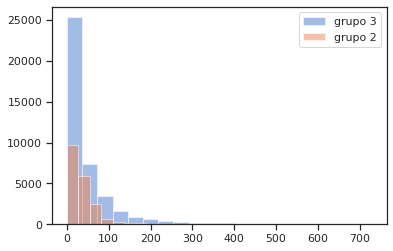

In [13]:
plt.hist(X_train[X_train['group_id']==3]['t3'], bins=20, alpha=.5, label="grupo 3")
plt.hist(X_train[X_train['group_id']==2]['t3'], bins=20, alpha=.5, label="grupo 2")
plt.legend()


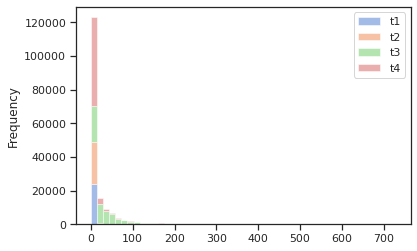

In [14]:
mediciones=["t1","t2","t3","t4"]
X_train[mediciones].plot(kind='hist', stacked=True, bins=50, alpha=.5)

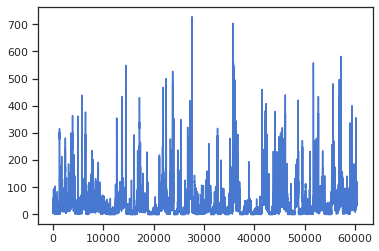

In [15]:
X_train.t3.plot.line()

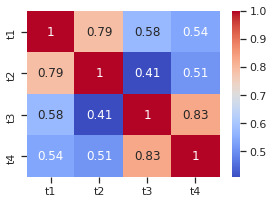

In [16]:
corr_types=correlacion(X_train[mediciones], grafica=True,figsize=(4,3))



![image.png](attachment:image.png)

# Exploración de valores nulos en el DataFrame

In [17]:
X_train.isnull().sum()

asset_id        0
group_id        0
week            0
weekday         0
t1          35672
t2          35672
t3              0
t4              0
dtype: int64

In [18]:
df_nulos=X_train[X_train.t1.isnull()]
df_nulos.describe()

,asset_id,group_id,week,weekday,t1,t2,t3,t4
count,35672.000000,35672.000000,35672.000000,35672.000000,0.0,0.0,35672.000000,35672.000000
mean,36.877551,2.551020,52.500000,4.000000,NaN,NaN,35.440401,6.569634
std,23.942982,0.497397,30.021247,2.000028,NaN,NaN,49.357624,20.114538
min,1.000000,2.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000
25%,17.000000,2.000000,26.750000,2.000000,NaN,NaN,8.000000,0.000000
50%,32.000000,3.000000,52.500000,4.000000,NaN,NaN,22.000000,1.000000
75%,55.000000,3.000000,78.250000,6.000000,NaN,NaN,44.000000,5.000000
max,82.000000,3.000000,104.000000,7.000000,NaN,NaN,549.000000,283.000000


In [19]:

for col in df_nulos.columns:
    print(col)
    print(df_nulos[col].nunique(),"\n")

asset_id
49 

group_id
2 

week
104 

weekday
7 

t1
0 

t2
0 

t3
439 

t4
235 



In [20]:
df_nulos.group_id.value_counts()

3    19656
2    16016
Name: group_id, dtype: int64

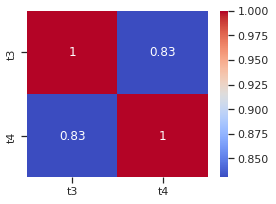

In [21]:
corr_types=correlacion(df_nulos[['t3','t4']], grafica=True,figsize=(4,3))

## Identificar assets con valores nulos en t1 y t2

_49 de las 83 instalaciones o assets tienen valores nulos en el timpo de medición 1 y 2_

In [22]:
assets_sin_t1t2 = df_nulos.asset_id.unique()  #identificación de assets sin t1 y t2
print(assets_sin_t1t2.shape)
assets_sin_t1t2

(49,)


array([ 1,  2,  4,  5,  6,  8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 25, 26, 27, 29, 30, 32, 33, 37, 39, 40, 44, 47, 48, 49, 51,
       52, 53, 55, 59, 61, 65, 66, 67, 70, 71, 73, 75, 78, 80, 82])

In [23]:
assets=X_train.asset_id.unique()
assets

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [24]:
assets_con_t1t2=assets[np.isin(assets,assets_sin_t1t2, invert=True)]   #asset con las cuatro mediciones
print(assets_con_t1t2.shape)
assets_con_t1t2

(34,)


array([ 3,  7,  9, 14, 24, 28, 31, 34, 35, 36, 38, 41, 42, 43, 45, 46, 50,
       54, 56, 57, 58, 60, 62, 63, 64, 68, 69, 72, 74, 76, 77, 79, 81, 83])

_Guardar tipo de asset según si tiene las 4 mediciones o solo 2 (t3 y t4)_


In [25]:
X_train['total_t'] = np.where(X_train.t1.isnull(),"2","4")
(pd.crosstab(X_train.group_id, X_train.total_t, margins=True)/728).astype('int32')

total_t,2,4,All
group_id,,,
2,22,5,27
3,27,29,56
All,49,34,83


# Preparar df data con series de tiempo

In [26]:
data=X_train
data['week_day']= data['week'].astype(str)+'_'+data['weekday'].astype(str)
data=data.set_index('asset_id')
data.head(3)

,group_id,week,weekday,t1,t2,t3,t4,total_t,week_day
asset_id,,,,,,,,,
1,2,1,1,NaN,NaN,19.0,0.0,2,1_1
1,2,1,2,NaN,NaN,8.0,0.0,2,1_2
1,2,1,3,NaN,NaN,9.0,0.0,2,1_3


In [27]:
data.groupby(data.index).size()  #número de observaciones en cada asset

asset_id
1     728
2     728
3     728
4     728
5     728
     ... 
79    728
80    728
81    728
82    728
83    728
Length: 83, dtype: int64

In [28]:
fecha_table = {
    "week_day": data.loc[1]['week_day'].reset_index(drop=True), "date": pd.date_range('2018-01-01', periods=728 , freq='D') }
fecha=pd.DataFrame(fecha_table)

dia_tabla={"week_day": data.loc[1]['week_day'].reset_index(drop=True), "day":np.arange(1,729,1)}
dia=pd.DataFrame(dia_tabla)

data=data.reset_index()
data=pd.merge(data,fecha, how='left', on='week_day')
data=pd.merge(data,dia, how='left', on='week_day')
data

,asset_id,group_id,week,weekday,t1,t2,t3,t4,total_t,week_day,date,day
0,1,2,1,1,NaN,NaN,19.0,0.0,2,1_1,2018-01-01,1
1,1,2,1,2,NaN,NaN,8.0,0.0,2,1_2,2018-01-02,2
2,1,2,1,3,NaN,NaN,9.0,0.0,2,1_3,2018-01-03,3
3,1,2,1,4,NaN,NaN,6.0,0.0,2,1_4,2018-01-04,4
4,1,2,1,5,NaN,NaN,6.0,2.0,2,1_5,2018-01-05,5
...,...,...,...,...,...,...,...,...,...,...,...,...
60419,83,3,104,3,1.0,0.0,48.0,8.0,4,104_3,2019-12-25,724
60420,83,3,104,4,0.0,0.0,37.0,1.0,4,104_4,2019-12-26,725
60421,83,3,104,5,1.0,0.0,48.0,9.0,4,104_5,2019-12-27,726
60422,83,3,104,6,2.0,0.0,53.0,11.0,4,104_6,2019-12-28,727


In [ ]:
data.to_csv('Output/X_train_formateado.csv', index=False)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60424 entries, 0 to 60423
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   asset_id  60424 non-null  int64         
 1   group_id  60424 non-null  int64         
 2   week      60424 non-null  int64         
 3   weekday   60424 non-null  int64         
 4   t1        24752 non-null  float64       
 5   t2        24752 non-null  float64       
 6   t3        60424 non-null  float64       
 7   t4        60424 non-null  float64       
 8   total_t   60424 non-null  object        
 9   week_day  60424 non-null  object        
 10  date      60424 non-null  datetime64[ns]
 11  day       60424 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 6.0+ MB


In [30]:
data.describe()

,asset_id,group_id,week,weekday,t1,t2,t3,t4,day
count,60424.000000,60424.000000,60424.000000,60424.000000,24752.000000,24752.000000,60424.000000,60424.000000,60424.000000
mean,42.000000,2.674699,52.500000,4.000000,1.536765,0.349548,45.185075,8.372484,364.500000
std,23.958495,0.468491,30.021075,2.000017,5.029422,2.004578,64.641355,23.002216,210.157039
min,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,2.000000,26.750000,2.000000,0.000000,0.000000,9.000000,0.000000,182.750000
50%,42.000000,3.000000,52.500000,4.000000,0.000000,0.000000,25.000000,1.000000,364.500000
75%,63.000000,3.000000,78.250000,6.000000,1.000000,0.000000,54.000000,6.000000,546.250000
max,83.000000,3.000000,104.000000,7.000000,76.000000,40.000000,728.000000,299.000000,728.000000


## Agruparar por asset y explorar series de timpo para 1 asset

In [31]:
data=data.set_index('asset_id')
porAsset=data.groupby(data.index)

In [32]:
medicionesXasset=porAsset.agg({'t1':'sum','t2':'sum','t3':'sum','t4':'sum'})
medicionesXasset

,t1,t2,t3,t4
asset_id,,,,
1,0.0,0.0,18911.0,3293.0
2,0.0,0.0,19489.0,6187.0
3,827.0,131.0,38694.0,5462.0
4,0.0,0.0,30643.0,6308.0
5,0.0,0.0,38389.0,5788.0
...,...,...,...,...
79,1981.0,293.0,103096.0,23572.0
80,0.0,0.0,17061.0,2387.0
81,206.0,31.0,14421.0,2978.0


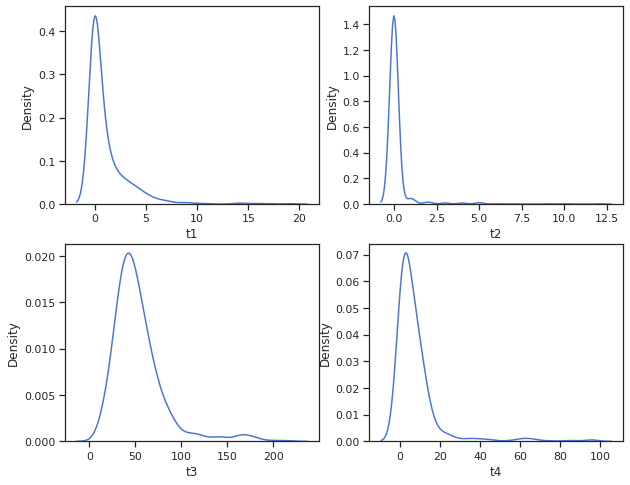

In [34]:
ASSET=3

mediciones=["t1","t2","t3","t4"]

fig, axes = plt.subplots(2,2, figsize=(10,8))

for var, subplot in zip(mediciones, axes.flatten()):
    sns.kdeplot(porAsset.get_group(ASSET)[var], ax=subplot)


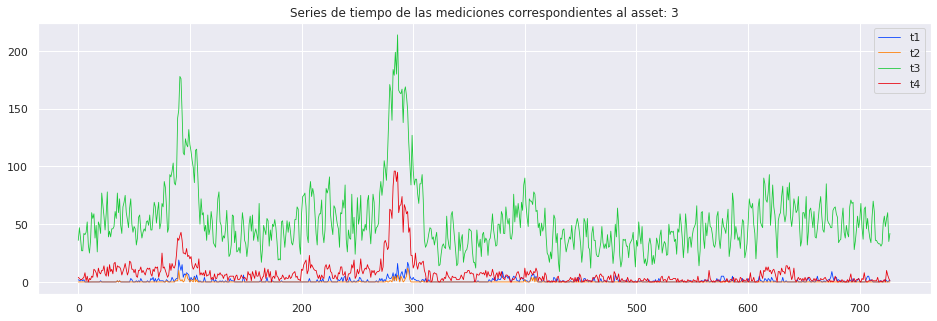

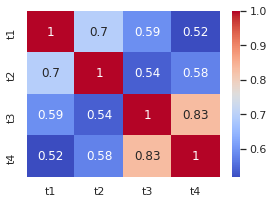

In [35]:


asset = porAsset.get_group(ASSET).reset_index()

# Gráfica de la serie de tiempo de las 4 mediciones
titulo='Series de tiempo de las mediciones correspondientes al asset: '+ str(ASSET)
sns.set(rc={'figure.figsize':(16,5)}, palette="bright")
asset[mediciones].plot(linewidth=0.8, title=titulo)

# Correlación entre las 4 mediciones para el asset de interes
corr_=correlacion(asset[mediciones], grafica=True,figsize=(4,3))  


